# Functional enrichment analysis with g:Profiler

In [1]:
library(tidyverse)
library(gprofiler2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Load DEG results

In [2]:
deg <- data.table::fread("../../_m/genes/diffExpr_maleVfemale_FDR05.txt") %>%
    select(gencodeID, ensemblID, Symbol, logFC, "adj.P.Val")
deg %>% head(2)

gencodeID,ensemblID,Symbol,logFC,adj.P.Val
<chr>,<chr>,<chr>,<dbl>,<dbl>
ENSG00000226555.1,ENSG00000226555,AGKP1,7.270752,1.837492e-256
ENSG00000229236.1,ENSG00000229236,TTTY10,7.417472,3.642704e-249


## Calculated enrichment and visual plot

In [3]:
save_ggplots <- function(fn, p, w, h){
    for(ext in c('.pdf', '.png', '.svg')){
        ggsave(paste0(fn, ext), plot=p, width=w, height=h)
    }
}

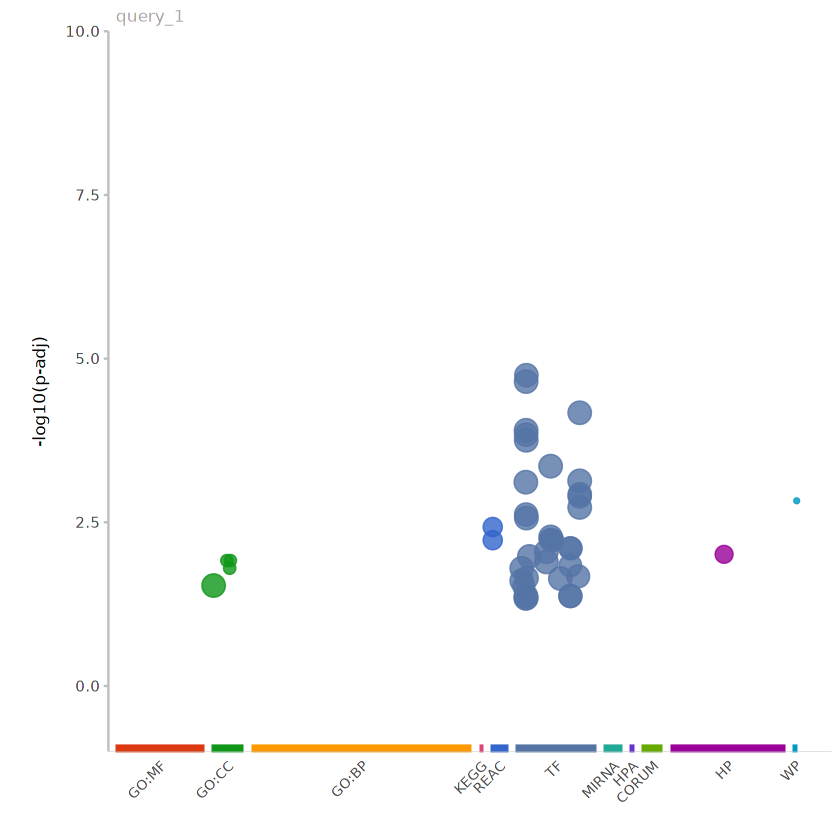

In [4]:
gostres <- gost(query=deg$ensemblID, organism="hsapiens")
gostres$result %>% 
    data.table::fwrite(file = "allDEGs_functional_enrichment.txt", sep="\t")

p <- gostplot(gostres, capped = FALSE, interactive = FALSE)
print(p)
save_ggplots("allDEGs_manhattan", p, 9, 5)

In [5]:
gostres$result 

query,significant,p_value,term_size,query_size,intersection_size,precision,recall,term_id,source,term_name,effective_domain_size,source_order,parents
<chr>,<lgl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<list>
query_1,TRUE,1.214280e-02,19,406,5,0.01231527,0.26315789,GO:0043186,GO:CC,P granule,18964,2109,"GO:0036464, GO:0060293"
query_1,TRUE,1.214280e-02,19,406,5,0.01231527,0.26315789,GO:0060293,GO:CC,germ plasm,18964,2601,GO:0045495
query_1,TRUE,1.590694e-02,20,406,5,0.01231527,0.25000000,GO:0045495,GO:CC,pole plasm,18964,2498,GO:0005737
query_1,TRUE,2.925763e-02,14808,406,347,0.85467980,0.02343328,GO:0005622,GO:CC,intracellular anatomical structure,18964,284,GO:0110165
query_1,TRUE,9.759154e-03,257,107,19,0.17757009,0.07392996,HP:0010985,HP,Gonosomal inheritance,4511,7444,HP:0000005
query_1,TRUE,3.731337e-03,582,230,30,0.13043478,0.05154639,REAC:R-HSA-2262752,REAC,Cellular responses to stress,10622,317,REAC:R-HSA-8953897
query_1,TRUE,5.933327e-03,596,230,30,0.13043478,0.05033557,REAC:R-HSA-8953897,REAC,Cellular responses to external stimuli,10622,316,REAC:0000000
query_1,TRUE,1.791050e-05,14041,441,363,0.82312925,0.02585286,TF:M09894_1,TF,Factor: E2F-4; motif: SNGGGCGGGAANN; match class: 1,19917,1443,TF:M09894
query_1,TRUE,2.243112e-05,14592,441,373,0.84580499,0.02556195,TF:M11529_1,TF,Factor: E2F-2; motif: GCGCGCGCNCS; match class: 1,19917,1403,TF:M11529


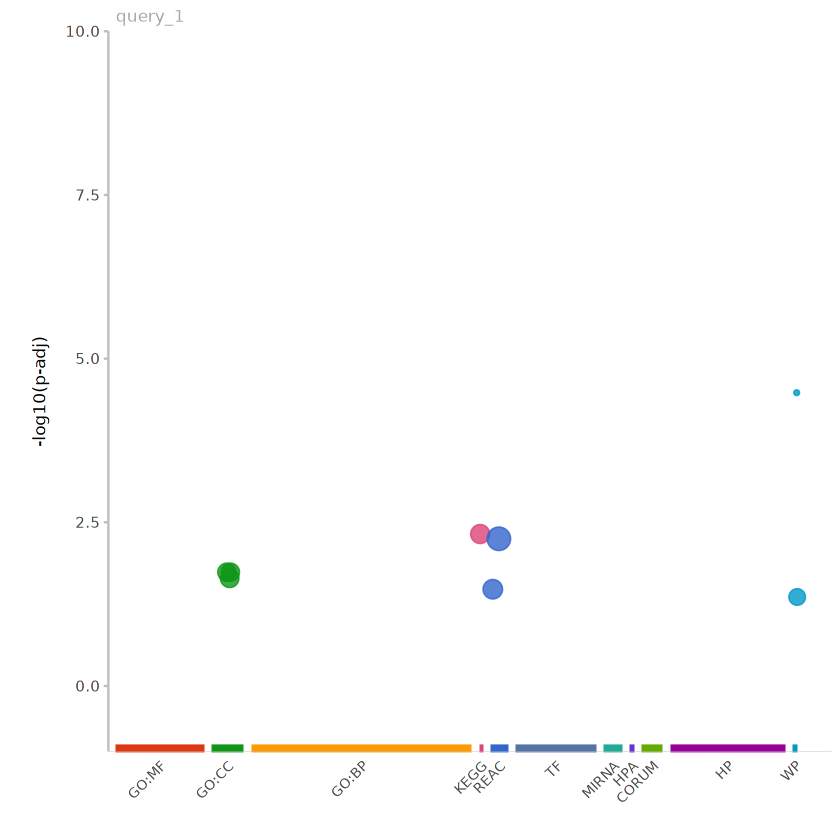

In [6]:
deg_male = deg %>% filter(logFC > 0)
gostres <- gost(query=deg_male$ensemblID, organism="hsapiens")
gostres$result %>% 
    data.table::fwrite(file = "male_bias_DEGs_functional_enrichment.txt", sep="\t")

p <- gostplot(gostres, capped = FALSE, interactive = FALSE)
print(p)
save_ggplots("male_bias_DEGs_manhattan", p, 9, 5)

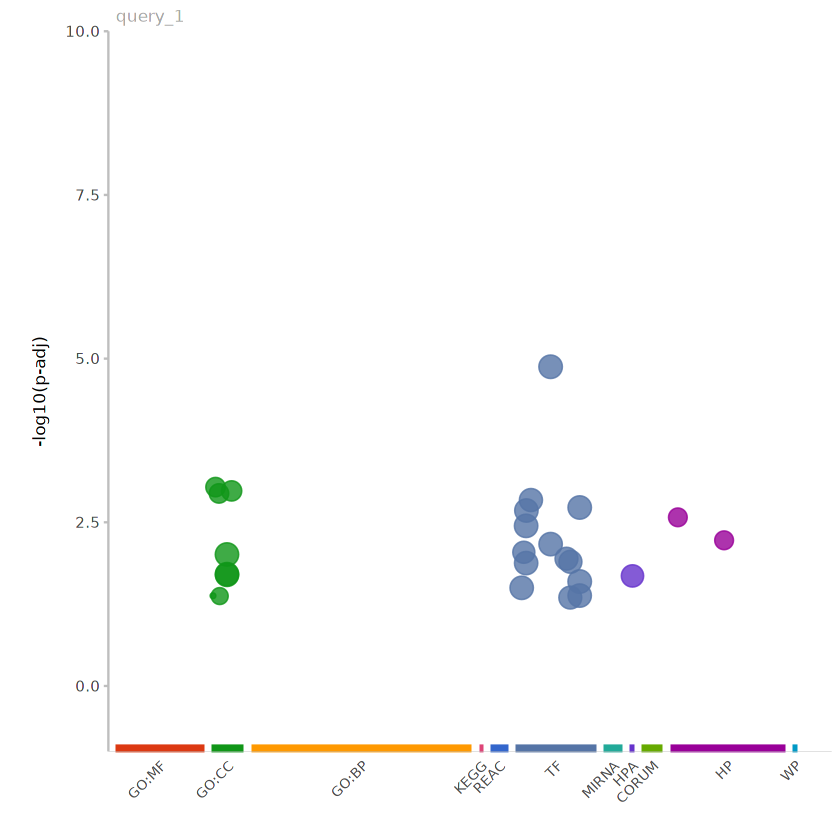

In [7]:
deg_female = deg %>% filter(logFC < 0)
gostres <- gost(query=deg_female$ensemblID, organism="hsapiens")
gostres$result %>% 
    data.table::fwrite(file = "female_bias_DEGs_functional_enrichment.txt", sep="\t")

p <- gostplot(gostres, capped = FALSE, interactive = FALSE)
print(p)
save_ggplots("female_bias_DEGs_manhattan", p, 9, 5)